In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [44]:
df=pd.read_csv("mushroom.csv")

In [45]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'


INFORMATION ABOUT THE ATTRIBUTES

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

We will replace these values with the original column values to understand data better.

In [46]:
df = df.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [47]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [49]:
#checking for duplicate value 
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [50]:
#checking for duplicate value 
df.duplicated().sum()


#so we donot found any duplicate value in dataset

0

In [51]:
for i in df.columns:
    missing = df[i][df[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


In [52]:
df['stalk-root'] = df['stalk-root'].replace(to_replace='?',value=np.nan)

In [53]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [54]:
# import simple imputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [57]:
#The .flatten() method converts the 2D array into a 1D array, which can then be properly assigned to a DataFrame column
df['stalk-root'] = impute.fit_transform(df[['stalk-root']]).flatten()


In [65]:
df['veil-type'].unique()

array(["'p'"], dtype=object)

In [63]:
#checking unique value in dataset 
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print("\n")

In [62]:
check_unique_values(df)

Unique values in column 'cap-shape':
["'x'" "'b'" "'s'" "'f'" "'k'" "'c'"]


Unique values in column 'cap-surface':
["'s'" "'y'" "'f'" "'g'"]


Unique values in column 'cap-color':
["'n'" "'y'" "'w'" "'g'" "'e'" "'p'" "'b'" "'u'" "'c'" "'r'"]


Unique values in column 'bruises%3F':
["'t'" "'f'"]


Unique values in column 'odor':
["'p'" "'a'" "'l'" "'n'" "'f'" "'c'" "'y'" "'s'" "'m'"]


Unique values in column 'gill-attachment':
["'f'" "'a'"]


Unique values in column 'gill-spacing':
["'c'" "'w'"]


Unique values in column 'gill-size':
["'n'" "'b'"]


Unique values in column 'gill-color':
["'k'" "'n'" "'g'" "'p'" "'w'" "'h'" "'u'" "'e'" "'b'" "'r'" "'y'" "'o'"]


Unique values in column 'stalk-shape':
["'e'" "'t'"]


Unique values in column 'stalk-root':
["'e'" "'c'" "'b'" "'r'"]


Unique values in column 'stalk-surface-above-ring':
["'s'" "'f'" "'k'" "'y'"]


Unique values in column 'stalk-surface-below-ring':
["'s'" "'f'" "'y'" "'k'"]


Unique values in column 'stalk-color-above-ring'

In [67]:
#from above we can see that veil-type only one value so we can drop it 
df= df.drop(labels=['veil-type'],axis=1)

In [68]:
df.to_csv('mushroom2.csv',index=True, header=False)

ANALYSIS


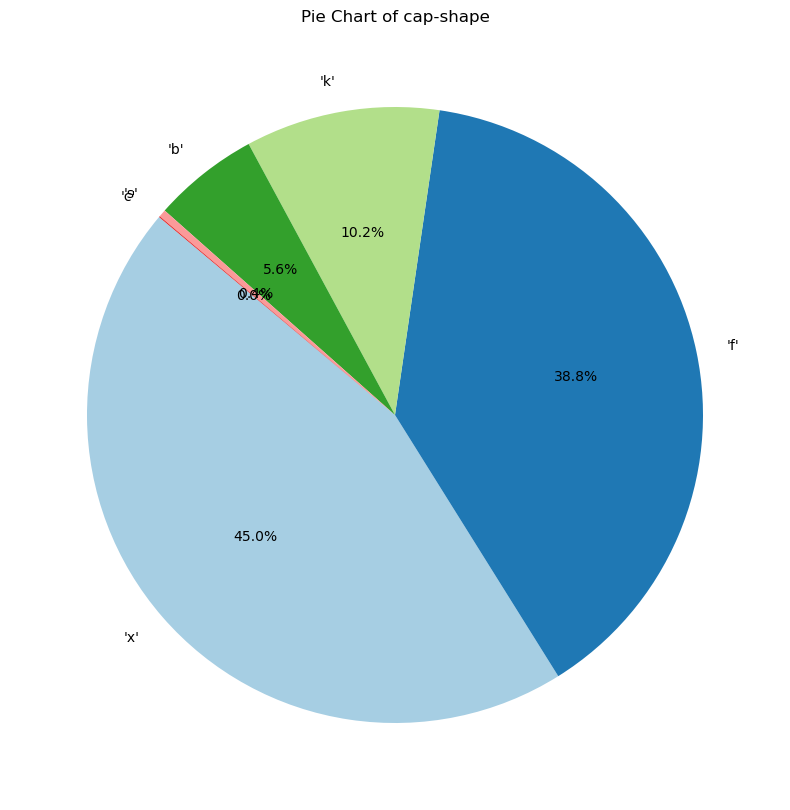

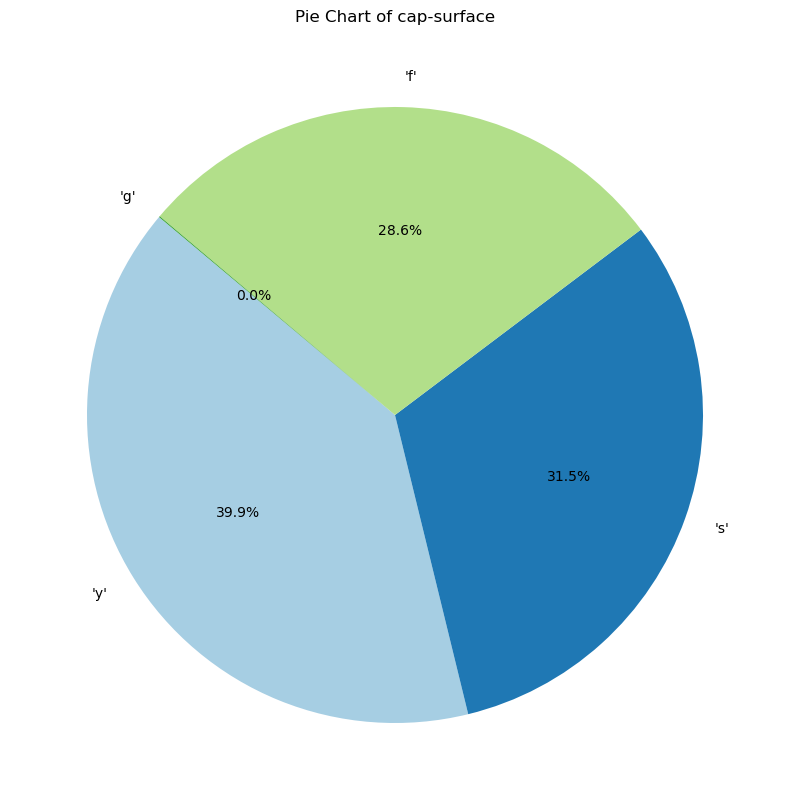

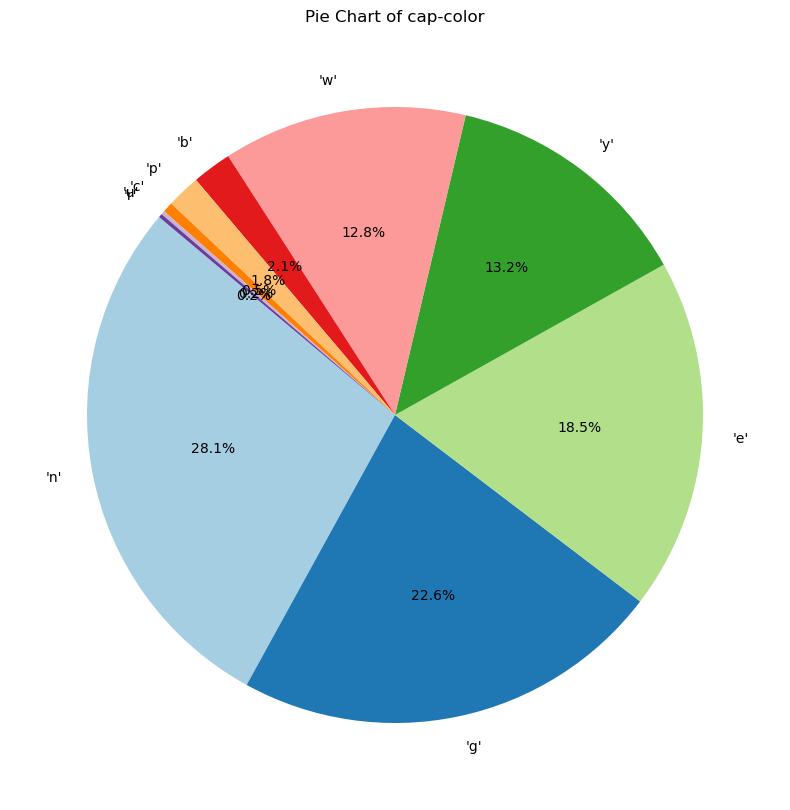

In [74]:

def plot_pie_chart(df, column):
    # Calculate the value counts for the categorical feature
    value_counts = df[column].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    plt.title(f'Pie Chart of {column}')
    plt.show()


plot_pie_chart(df, 'cap-shape')
plot_pie_chart(df, 'cap-surface')
plot_pie_chart(df, 'cap-color')


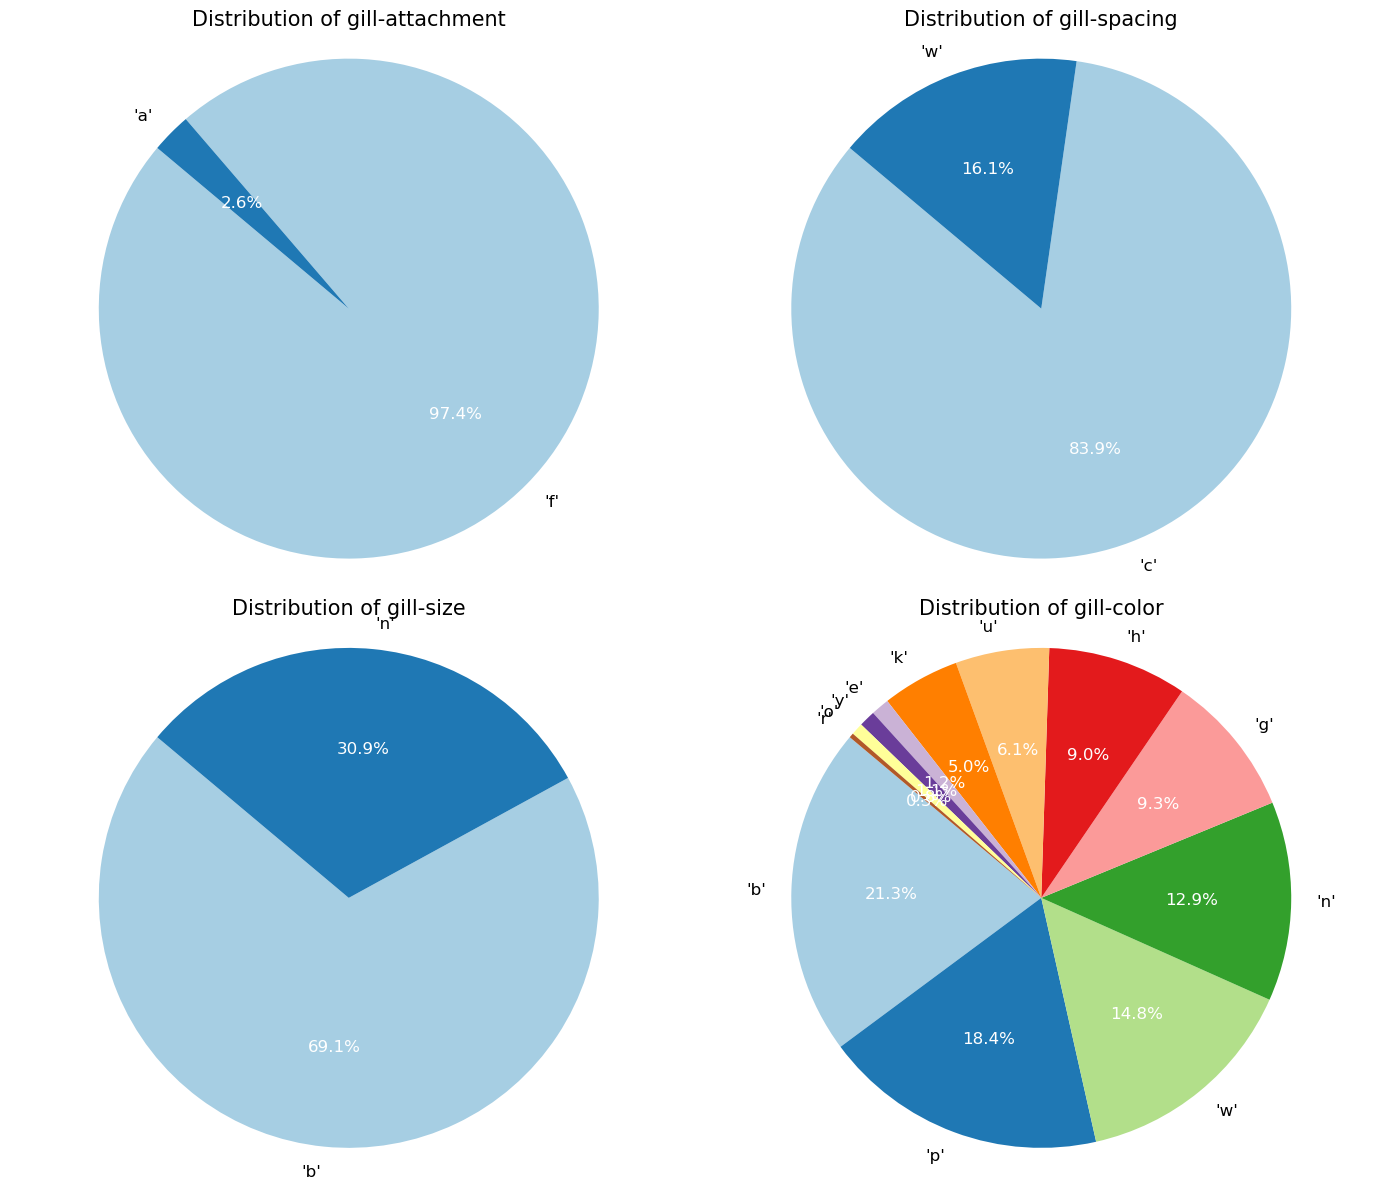

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_chart(df, column):
    # Calculate the value counts for the categorical feature
    value_counts = df[column].value_counts()
    
    # Define a color palette
    colors = plt.cm.Paired(range(len(value_counts)))
    
    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Improve the aesthetics
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

def plot_multiple_pie_charts(df, columns):
    num_columns = len(columns)
    
    # Determine the grid size for subplots
    rows = (num_columns + 1) // 2  # Calculate rows needed for a 2-column layout
    
    # Set up the subplot grid
    fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 6))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each pie chart
    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()
        colors = plt.cm.Paired(range(len(value_counts)))
        
        wedges, texts, autotexts = axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(12)
        
        axes[i].set_title(f'Distribution of {column}', fontsize=15)
        axes[i].axis('equal')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your DataFrame
columns_to_plot = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
plot_multiple_pie_charts(df, columns_to_plot)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  